In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from loguru import logger
import os

# OCR Only

In [13]:
notebook_path = Path().resolve().parent
print(notebook_path)

# Construct the filename relative to the new path
filename = notebook_path / "notebooks/new_data/df_standard_ocr_only.csv"

# Read the CSV file
df_standard_ocr_only = pd.read_csv(filename)
print(df_standard_ocr_only)

C:\Users\baatout\PycharmProjects\afm-vlm\experiments\second_experiment
                                               Prompt  GT_Keyframe  Top_1  \
0                                   learning outcomes            3     32   
1    What are the learning outcomes from the lecture?            3     85   
2        What is the relation of protien and muscles?           26     27   
3                               Essential fatty acids           29     29   
4                                   fish oil capsules           30     30   
5   what is the functioning of fish oil capsules a...           30     30   
6                            calcium as micronutrient           46     46   
7        Explain where vitamins function as coenzymes           41     41   
8   Give a list of food items where I can attain s...           45     42   
9           what is calcium commonly supplemented for           46     46   
10       How are nutrients extracted from plant cells           50     50   
11   

In [27]:
def calculate_and_plot_gt_keyframe_percentage(data):
    # Convert data to a DataFrame
    df = pd.DataFrame(data)

    # Plotting
    plt.figure(figsize=(10, 6))

    total = len(df)
    top_1_count = 0
    top_2_count = 0
    top_3_count = 0

    # Iterate through the DataFrame to count the occurrences
    for index, row in df.iterrows():
        if row['GT_Keyframe'] == row['Top_1']:
            top_1_count += 1
        elif row['GT_Keyframe'] == row['Top_2']:
            top_2_count += 1
        elif row['GT_Keyframe'] == row['Top_3']:
            top_3_count += 1

    # Calculate percentages
    top_1_percentage = (top_1_count / total) * 100
    top_2_percentage = (top_2_count / total) * 100
    top_3_percentage = (top_3_count / total) * 100

    # Print the results
    print(f"GT_Keyframe in Top 1: {top_1_percentage:.2f}%")
    print(f"GT_Keyframe in Top 2: {top_2_percentage:.2f}%")
    print(f"GT_Keyframe in Top 3: {top_3_percentage:.2f}%")

    # Data for plotting
    labels = ['Top 1', 'Top 2', 'Top 3']
    percentages = [top_1_percentage, top_2_percentage, top_3_percentage]

    # Create the plot
    plt.figure(figsize=(8, 5))
    plt.bar(labels, percentages, color=['blue', 'green', 'red'])
    plt.xlabel('Position')
    plt.ylabel('Percentage')
    plt.title('Percentage of GT_Keyframe in Top Positions \n (OCR Only)')
    plt.ylim(0, 100)

#hard coded
img_paths = 150

def check_proximity_keyframes(gt):
    proximity_kf = []

    # Define the boundaries for the image paths
    max_index = img_paths - 1

    if gt == 0:
        logger.info("No proximity - Invalid GT")
    elif gt == 1:
        proximity_kf.extend(range(1, 5))
    elif gt >= max_index:
        proximity_kf.extend(range(max_index, max_index - 5, -1))
    else:
        proximity_kf.extend([gt - 2, gt - 1, gt, gt + 1, gt + 2])

    # Ensure all indexes are within valid range
    proximity_kf = [i for i in proximity_kf if 0 <= i <= max_index]

    return proximity_kf



GT_Keyframe in Top 1: 45.45%
GT_Keyframe in Top 2: 22.73%
GT_Keyframe in Top 3: 0.00%


<Figure size 1000x600 with 0 Axes>

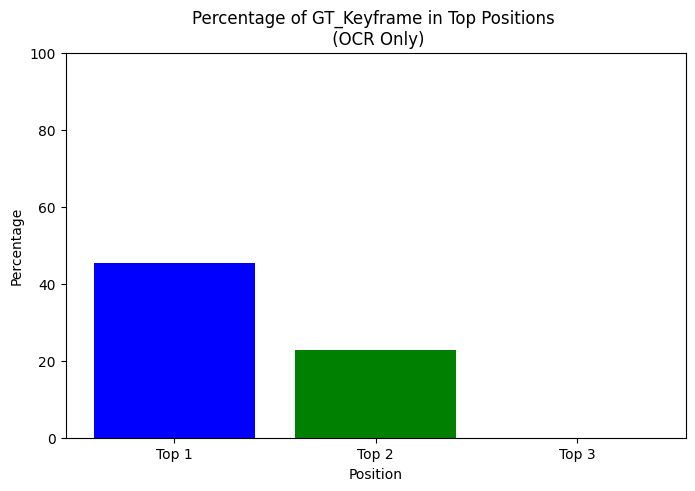

In [28]:
# call
calculate_and_plot_gt_keyframe_percentage(df_standard_ocr_only)

In [40]:
# iterate through data frame 
df = df_standard_ocr_only
res = []
for _, row in df.iterrows():
        logger.info(row['Prompt'])
        gt_keyframe = row['GT_Keyframe']
        prox =check_proximity_keyframes(gt_keyframe)
        res.append(prox)

prox_yes_no = []
for i, row in df.iterrows():
    if row['Top_1'] or row['Top_2'] or row['Top_3'] in res[i]: 
        prox_yes_no.append(1)
    else: 
        prox_yes_no.append(0)

2024-07-11 17:22:02.294 | INFO     | __main__:<module>:5 - learning outcomes
2024-07-11 17:22:02.294 | INFO     | __main__:<module>:5 - What are the learning outcomes from the lecture?
2024-07-11 17:22:02.304 | INFO     | __main__:<module>:5 - What is the relation of protien and muscles?
2024-07-11 17:22:02.304 | INFO     | __main__:<module>:5 - Essential fatty acids
2024-07-11 17:22:02.304 | INFO     | __main__:<module>:5 - fish oil capsules
2024-07-11 17:22:02.304 | INFO     | __main__:<module>:5 - what is the functioning of fish oil capsules and its relation to vitamins
2024-07-11 17:22:02.309 | INFO     | __main__:<module>:5 - calcium as micronutrient
2024-07-11 17:22:02.309 | INFO     | __main__:<module>:5 - Explain where vitamins function as coenzymes
2024-07-11 17:22:02.309 | INFO     | __main__:<module>:5 - Give a list of food items where I can attain some important micronutrient
2024-07-11 17:22:02.309 | INFO     | __main__:<module>:5 - what is calcium commonly supplemented fo

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


# OCR LAVA

In [42]:
# read data from csv file
notebook_path = Path().resolve().parent
print(notebook_path)

# Construct the filename relative to the new path
filename = notebook_path / "notebooks/new_data/df_standard_ocr_lava.csv"
df_ocr_lava = pd.read_csv(filename)
df_ocr_lava.head()

C:\Users\baatout\PycharmProjects\afm-vlm\experiments\second_experiment


,Prompt,GT_Keyframe,Top_1,Top_2,Top_3
0,learning outcomes,3,85,64,4
1,What are the learning outcomes from the lecture?,3,64,85,4
2,What is the relation of protien and muscles?,26,27,72,24
3,Essential fatty acids,29,54,36,29
4,fish oil capsules,30,53,30,2


GT_Keyframe in Top 1: 4.55%
GT_Keyframe in Top 2: 4.55%
GT_Keyframe in Top 3: 22.73%


<Figure size 1000x600 with 0 Axes>

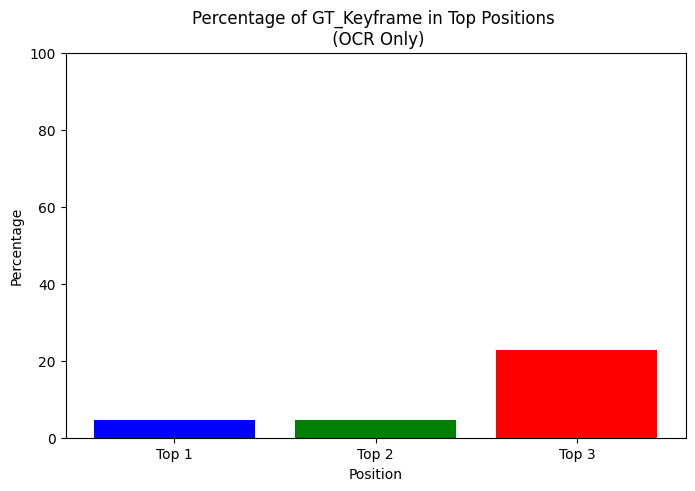

In [43]:
# call
calculate_and_plot_gt_keyframe_percentage(df_ocr_lava)

In [45]:
# iterate through data frame 
df = df_ocr_lava
# iterate through data frame 
res = []
for _, row in df.iterrows():
        logger.info(row['Prompt'])
        gt_keyframe = row['GT_Keyframe']
        prox =check_proximity_keyframes(gt_keyframe)
        res.append(prox)

prox_yes_no = []
for i, row in df.iterrows():
    if row['Top_1'] or row['Top_2'] or row['Top_3'] in res[i]: 
        prox_yes_no.append(1)
    else: 
        prox_yes_no.append(0)

print(prox_yes_no)

2024-07-11 17:25:20.276 | INFO     | __main__:<module>:6 - learning outcomes
2024-07-11 17:25:20.276 | INFO     | __main__:<module>:6 - What are the learning outcomes from the lecture?
2024-07-11 17:25:20.276 | INFO     | __main__:<module>:6 - What is the relation of protien and muscles?
2024-07-11 17:25:20.281 | INFO     | __main__:<module>:6 - Essential fatty acids
2024-07-11 17:25:20.281 | INFO     | __main__:<module>:6 - fish oil capsules
2024-07-11 17:25:20.281 | INFO     | __main__:<module>:6 - what is the functioning of fish oil capsules and its relation to vitamins
2024-07-11 17:25:20.281 | INFO     | __main__:<module>:6 - calcium as micronutrient
2024-07-11 17:25:20.281 | INFO     | __main__:<module>:6 - Explain where vitamins function as coenzymes
2024-07-11 17:25:20.281 | INFO     | __main__:<module>:6 - Give a list of food items where I can attain some important micronutrient
2024-07-11 17:25:20.281 | INFO     | __main__:<module>:6 - what is calcium commonly supplemented fo

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


# LLM Long Summary

In [47]:
# read data from csv file
notebook_path = Path().resolve().parent
print(notebook_path)

# Construct the filename relative to the new path
filename = notebook_path / "notebooks/new_data/df_standard_llm_long_summary.csv"
df_long_summary = pd.read_csv(filename)
df_long_summary.head()

C:\Users\baatout\PycharmProjects\afm-vlm\experiments\second_experiment


,Prompt,GT_Keyframe,Top_1,Top_2,Top_3
0,learning outcomes,3,85,3,4
1,What are the learning outcomes from the lecture?,3,85,3,1
2,What is the relation of protien and muscles?,26,24,65,27
3,Essential fatty acids,29,29,28,37
4,fish oil capsules,30,30,34,29


GT_Keyframe in Top 1: 45.45%
GT_Keyframe in Top 2: 18.18%
GT_Keyframe in Top 3: 9.09%


<Figure size 1000x600 with 0 Axes>

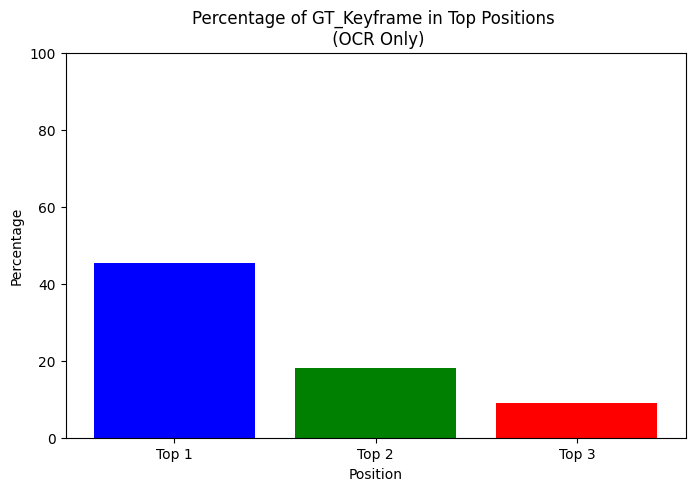

In [48]:
# call
calculate_and_plot_gt_keyframe_percentage(df_long_summary)

In [49]:
# iterate through data frame 
df = df_long_summary
res = []
for _, row in df.iterrows():
        logger.info(row['Prompt'])
        gt_keyframe = row['GT_Keyframe']
        prox =check_proximity_keyframes(gt_keyframe)
        res.append(prox)

prox_yes_no = []
for i, row in df.iterrows():
    if row['Top_1'] or row['Top_2'] or row['Top_3'] in res[i]: 
        prox_yes_no.append(1)
    else: 
        prox_yes_no.append(0)

print(prox_yes_no)

2024-07-11 17:25:57.342 | INFO     | __main__:<module>:5 - learning outcomes
2024-07-11 17:25:57.357 | INFO     | __main__:<module>:5 - What are the learning outcomes from the lecture?
2024-07-11 17:25:57.357 | INFO     | __main__:<module>:5 - What is the relation of protien and muscles?
2024-07-11 17:25:57.359 | INFO     | __main__:<module>:5 - Essential fatty acids
2024-07-11 17:25:57.359 | INFO     | __main__:<module>:5 - fish oil capsules
2024-07-11 17:25:57.360 | INFO     | __main__:<module>:5 - what is the functioning of fish oil capsules and its relation to vitamins
2024-07-11 17:25:57.360 | INFO     | __main__:<module>:5 - calcium as micronutrient
2024-07-11 17:25:57.361 | INFO     | __main__:<module>:5 - Explain where vitamins function as coenzymes
2024-07-11 17:25:57.362 | INFO     | __main__:<module>:5 - Give a list of food items where I can attain some important micronutrient
2024-07-11 17:25:57.363 | INFO     | __main__:<module>:5 - what is calcium commonly supplemented fo

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


# OCR TRANSCRIPTIONS - Still not possible since they are nans

In [50]:
df_ocr_transcriptions = pd.read_csv('experiments/second_experiment/new_data/df_standard_ocr_transcriptions.csv')
df_ocr_transcriptions.head()

FileNotFoundError: [Errno 2] No such file or directory: 'experiments/second_experiment/new_data/df_standard_ocr_transcriptions.csv'

In [31]:
# call
calculate_and_plot_gt_keyframe_percentage(df_ocr_transcriptions)

NameError: name 'df_ocr_transcriptions' is not defined

In [ ]:
df = df_ocr_transcriptions
res = []
for _, row in df.iterrows():
        logger.info(row['Prompt'])
        gt_keyframe = row['GT_Keyframe']
        prox =check_proximity_keyframes(gt_keyframe)
        res.append(prox)

prox_yes_no = []
for i, row in df.iterrows():
    if row['Top_1'] or row['Top_2'] or row['Top_3'] in res[i]: 
        prox_yes_no.append(1)
    else: 
        prox_yes_no.append(0)

print(prox_yes_no)